In [1]:
import sys
sys.path.append("../")
sys.path.append('C:\Users\James Pino\PycharmProjects\Magine')
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import magine.ontology.enrichment_tools as et
import magine.networks.visualization.notebook_tools as nt
import magine.networks.visualization.notebooks.view as view
from magine.networks.network_subgraphs import NetworkSubgraphs
from exp_data import exp_data

<IPython.core.display.Javascript object>

# Exploring network using enrichment analysis

### This example uses the enrichment output we just obtained to explore the network.

First, lets load the molecular network and the enrichment output from the previous runs. 

In [2]:
enrichment_array = pd.read_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)
network = nx.read_gpickle('Data/cisplatin_based_network.p')
subgraph_gen = NetworkSubgraphs(network=network, exp_data=exp_data)

For this example, we will only look at the proteomics data. 

In [3]:
proteomics = enrichment_array[enrichment_array['category'].str.contains('proteomics')].copy()

For this example, we just want to look at "biological processes" descriptions, so we will limit our analysis to only databases with this type of information

In [4]:
print(proteomics['db'].unique())

process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]

display(proteomics.head(10))

['KEGG_2016' 'NCI-Nature_2016' 'Panther_2016' 'WikiPathways_2016'
 'BioCarta_2016' 'Humancyc_2016' 'Reactome_2016' 'KEA_2015'
 'GO_Biological_Process_2017' 'GO_Molecular_Function_2017'
 'GO_Cellular_Component_2017' 'ChEA_2016' 'TRANSFAC_and_JASPAR_PWMs'
 'ENCODE_TF_ChIP-seq_2015' 'Kinase_Perturbations_from_GEO_down'
 'Kinase_Perturbations_from_GEO_up'
 'LINCS_L1000_Kinase_Perturbations_down'
 'LINCS_L1000_Kinase_Perturbations_up'
 'Ligand_Perturbations_from_GEO_down' 'Ligand_Perturbations_from_GEO_up'
 'DrugMatrix' 'Drug_Perturbations_from_GEO_2014']


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
0,Spliceosome_Homo sapiens_hsa03040,1,90.501003,3.360688e-20,"ALYREF,DDX39B,DDX5,HNRNPA1,HNRNPA3,HNRNPC,HNRNPM,HNRNPU,HSPA2,PRPF19,PRPF3,PRPF8,PUF60,RBM8A,RBMX,SF3A1,SF3B1,SNRNP70,SNRPA,SNRPB,SNRPC,SNRPD1,SNRPD2,SNRPD3,SNRPE,SNRPF,SNW1,SRSF1,SRSF3,SRSF4,SRSF5,SRSF6,SRSF7,SRSF9,THOC2,U2AF1,U2AF2",37,01hr,proteomics_both,KEGG_2016
1,Ribosome_Homo sapiens_hsa03010,2,55.241281,1.476445e-12,"RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL26L1,RPL29,RPL3,RPL36,RPL37A,RPL5,RPL7,RPL7A,RPL8,RPLP0,RPLP1,RPS14,RPS18,RPS19,RPS26,RPS3,RPS5,RPS6",29,01hr,proteomics_both,KEGG_2016
2,Salmonella infection_Homo sapiens_hsa05132,3,16.060192,5.467710e-03,"ARPC1A,ARPC4,DYNC1H1,DYNC2H1,FLNB,KLC2,MAPK3,MYH10,MYH9,NLRC4,RELA,ROCK2",12,01hr,proteomics_both,KEGG_2016
3,Bacterial invasion of epithelial cells_Homo sapiens_hsa05100,4,12.601933,2.643585e-02,"ARPC1A,ARPC4,CAV1,CD2AP,CLTCL1,CTNNB1,CTTN,MET,SEPT9,SHC1",10,01hr,proteomics_both,KEGG_2016
4,Ubiquitin mediated proteolysis_Homo sapiens_hsa04120,5,12.002185,2.643585e-02,"BRCA1,CDC16,CDC20,CUL3,CUL4A,CUL4B,HERC4,HUWE1,PIAS1,PRPF19,SAE1,TCEB1,UBA1,UBE4B",14,01hr,proteomics_both,KEGG_2016
5,HTLV-I infection_Homo sapiens_hsa05166,6,11.920403,4.686993e-02,"APC,CALR,CDC16,CDC20,CHEK1,CTNNB1,HLA-DQA2,IKBKG,MAP2K4,MAP3K3,MYB,MYC,RANBP3,RELA,RRAS2,SLC25A5,SLC25A6,TLN1,VDAC1,VDAC3",20,01hr,proteomics_both,KEGG_2016
6,Pathogenic Escherichia coli infection_Homo sapiens_hsa05130,7,11.801291,3.381820e-02,"ARPC1A,ARPC4,CTNNB1,CTTN,KRT18,NCL,ROCK2,YWHAZ",8,01hr,proteomics_both,KEGG_2016
7,RNA transport_Homo sapiens_hsa03013,8,10.912681,4.799956e-02,"ALYREF,DDX39B,EIF2S2,EIF2S3,EIF3B,EIF4EBP2,NUP188,NUP88,NUP98,PABPC1,PABPC3,PABPC4,RBM8A,THOC2,TPR",15,01hr,proteomics_both,KEGG_2016
8,Huntington's disease_Homo sapiens_hsa05016,9,10.478332,4.799956e-02,"CLTCL1,COX4I1,COX5A,COX5B,COX6C,DCTN1,DNAH17,HDAC1,NDUFB9,SLC25A5,SLC25A6,TGM2,UQCRC1,UQCRC2,VDAC1,VDAC3",16,01hr,proteomics_both,KEGG_2016
9,mRNA surveillance pathway_Homo sapiens_hsa03015,10,9.547068,4.799956e-02,"ALYREF,CPSF6,DAZAP1,DDX39B,FIP1L1,PABPC1,PABPC3,PABPC4,PPP1CC,RBM8A",10,01hr,proteomics_both,KEGG_2016


In [5]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       category=['proteomics_up'], 
                                       sample_id='01hr', 
                                       db=process_dbs
                                      )
display(time_1_hour_prot.head(10))

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
189887,"negative regulation of transcription, DNA-templated",1,68.261978,0.001601,"ARID5B,BCLAF1,BRCA1,CALR,CBY1,CHD8,ENO1,HDAC1,ILF3,KHDRBS1,LIMS1,LRRFIP1,MYB,RBM15,RSF1,SHC1,SPEN,XRCC6,ZBED6,ZC3H8,ZNF350,ZNF552",22,01hr,proteomics_up,GO_Biological_Process_2017
189000,Cell Cycle_Homo sapiens_R-HSA-1640170,1,36.507320,0.000267,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,HSPA2,KNTC1,LMNA,MAPK3,MYC,NPM1,NUP188,NUP88,PDS5B,PLK1,PRIM1,RBL1,RSF1,SFI1,SMC1A,TOP2A,TYMS,YWHAZ",28,01hr,proteomics_up,Reactome_2016
189001,Interleukin-2 signaling_Homo sapiens_R-HSA-451927,2,30.220851,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,01hr,proteomics_up,Reactome_2016
189889,resolution of meiotic recombination intermediates,3,29.557281,0.016485,"ERCC4,SLX4,TOP2A,TOP2B",4,01hr,proteomics_up,GO_Biological_Process_2017
189002,"Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988",3,29.303950,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF,YWHAZ",16,01hr,proteomics_up,Reactome_2016
189003,"Cell Cycle, Mitotic_Homo sapiens_R-HSA-69278",4,27.727089,0.001586,"AKAP9,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,KNTC1,LMNA,MAPK3,MYC,NUP188,NUP88,PDS5B,PLK1,PRIM1,RBL1,SFI1,SMC1A,TOP2A,TYMS",22,01hr,proteomics_up,Reactome_2016
189004,Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526,5,27.242088,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",15,01hr,proteomics_up,Reactome_2016
189005,MAPK family signaling cascades_Homo sapiens_R-HSA-5683057,6,26.440058,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,DNAJB1,IRS2,MAPK3,MARK3,MYC,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,01hr,proteomics_up,Reactome_2016
189006,Signaling by FGFR2_Homo sapiens_R-HSA-5654738,7,25.922377,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,HNRNPA1,HNRNPM,INSR,IRS2,MAPK3,MAPKAP1,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",18,01hr,proteomics_up,Reactome_2016
189007,Insulin receptor signalling cascade_Homo sapiens_R-HSA-74751,8,25.791980,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,INSR,IRS2,MAPK3,MARK3,PIK3R4,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,01hr,proteomics_up,Reactome_2016


Since terms across databases might be redundant ("Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988" and "Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526" have nearly a full overlap of genes), we want to eliminate duplicate terms and focus on the most enriched. For that we use the Jaccard Index. It is implmented in the find_similar_terms function in enrichment_tools (et).

In [6]:
filtered_1hr = et.filter_similar_terms(time_1_hour_prot, threshold=.7)
display(filtered_1hr.head(10))

Number of rows went from 89 to 25


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
189887,"negative regulation of transcription, DNA-templated",1,68.261978,0.001601,"ARID5B,BCLAF1,BRCA1,CALR,CBY1,CHD8,ENO1,HDAC1,ILF3,KHDRBS1,LIMS1,LRRFIP1,MYB,RBM15,RSF1,SHC1,SPEN,XRCC6,ZBED6,ZC3H8,ZNF350,ZNF552",22,01hr,proteomics_up,GO_Biological_Process_2017
189000,Cell Cycle_Homo sapiens_R-HSA-1640170,1,36.507320,0.000267,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,HSPA2,KNTC1,LMNA,MAPK3,MYC,NPM1,NUP188,NUP88,PDS5B,PLK1,PRIM1,RBL1,RSF1,SFI1,SMC1A,TOP2A,TYMS,YWHAZ",28,01hr,proteomics_up,Reactome_2016
189001,Interleukin-2 signaling_Homo sapiens_R-HSA-451927,2,30.220851,0.001586,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,01hr,proteomics_up,Reactome_2016
189889,resolution of meiotic recombination intermediates,3,29.557281,0.016485,"ERCC4,SLX4,TOP2A,TOP2B",4,01hr,proteomics_up,GO_Biological_Process_2017
189008,Signalling by NGF_Homo sapiens_R-HSA-166520,9,25.783068,0.001586,"AKAP13,AKAP9,ARHGEF16,BRAF,CNKSR2,CUL3,HDAC1,INSR,IRS2,MAPK3,MAPKAP1,MARK3,MEF2C,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,SQSTM1,TLN1,VWF",21,01hr,proteomics_up,Reactome_2016
189893,mitotic cytokinesis,7,24.798241,0.030953,"APC,CEP55,PDCD6IP,PLK1,SPTBN1",5,01hr,proteomics_up,GO_Biological_Process_2017
188581,XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309,1,22.460249,0.011088,"APC,ARPC1A,BRAF,CAPZA1,CDH7,CLNK,EIF4ENIF1,IGFBP2,INPPL1,INSR,IRS2,KHDRBS1,KLC2,LASP1,LIMS1,LRP1B,MAPK3,MAPKAP1,MET,MLPH,PDCD6IP,PLEC,PTPRA,SCRIB,SDCBP,SHC1,SPTBN1,TLN1,VWF,ZYX",30,01hr,proteomics_up,WikiPathways_2016
189894,chloride transport,8,22.310453,0.029255,"ANO4,ANO5,ANO6,CLIC4,SLC26A8",5,01hr,proteomics_up,GO_Biological_Process_2017
189032,Axon guidance_Homo sapiens_R-HSA-422475,33,20.509597,0.001586,"AKAP9,ARPC1A,BRAF,CLASP2,CLTCL1,CNKSR2,CRMP1,CUL3,IRS2,MAPK3,MARK3,MET,NRCAM,PTPRA,RASGRF2,SDCBP,SHC1,SPTBN1,SPTBN2,SRGAP2,TLN1,VWF",22,01hr,proteomics_up,Reactome_2016
188582,Retinoblastoma (RB) in Cancer_Homo sapiens_WP2446,2,17.166900,0.017626,"CDC7,HDAC1,MYC,PRIM1,RRM1,SMC1A,TOP2A,TYMS",8,01hr,proteomics_up,WikiPathways_2016


Now we can explore the top hits, which has been slimmed from 89 to 33 terms. Generally this is where the expert knowledge comes in. However, a quick search with each term and search terms of you molecule of interest tend to be useful. 

The first hit is 'negative regulation of transcription', which means that something caused genes not to be transcribed. Cisplatin causes DNA damage, thus negative regulaton of transcription makes sense. So does top hit 2, 'Cell Cycle_Homo sapiens_R-HSA-1640170'. 

A quick search for 'Interleukin-2 signaling' and 'Cisplatin' __[link](https://www.google.com/search?rlz=1C1CHBD_enUS721US721&ei=KzNeWuCxBsfq_AaSgYuYDQ&q=Interleukin-2+signaling+cisplatin&oq=Interleukin-2+signaling+cisplatin&gs_l=psy-ab.3..35i39k1.8097.9052.0.9196.10.10.0.0.0.0.145.897.7j3.10.0....0...1c.1.64.psy-ab..3.2.218....0.TInUjcZY740)__ returns a paper titled "Cisplatin at clinically relevant concentrations enhances interleukin-2 synthesis by human primary blood lymphocytes." __[link](https://www.ncbi.nlm.nih.gov/pubmed/10211553)__


We can link the two together to see how once might regulate the other by looking at the molecular interactions.

## Expected findings

In [7]:
shorten_names = {
    'Cell Cycle_Homo sapiens_R-HSA-1640170':'Cell Cycle',
    'DNA Repair_Homo sapiens_R-HSA-73894' : 'DNA Repair',
    'Interleukin-2 signaling_Homo sapiens_R-HSA-451927': 'IL2',
    'resolution of meiotic recombination intermediates': 'Meiotic Recombination'
                }
renamed_1hr = filtered_1hr.copy()
renamed_1hr['term_name'] = renamed_1hr['term_name'].replace(shorten_names)
term_net_1, mol_net_1 = nt.create_subnetwork(shorten_names.values(), renamed_1hr, network, '1hr')

('DNA Repair', 12)
('IL2', 16)
('Meiotic Recombination', 4)
('Cell Cycle', 28)
Looking for direct edges
No edges between DNA Repair and IL2
No edges between Meiotic Recombination and IL2


In [8]:
dna_genes = et.term_to_genes(df=renamed_1hr, term='DNA Repair')
dna_network = subgraph_gen.shortest_paths_between_lists(dna_genes, max_length=3)

Removing from list


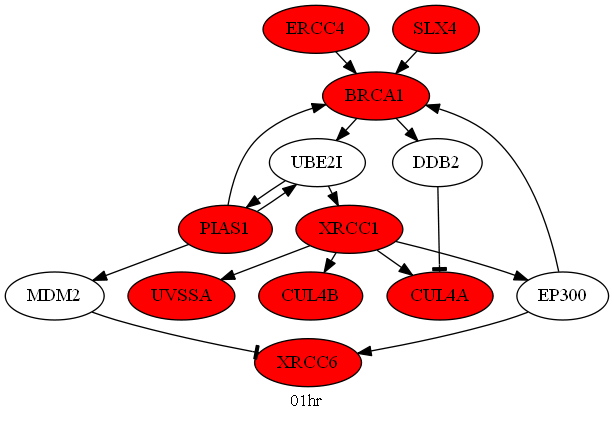

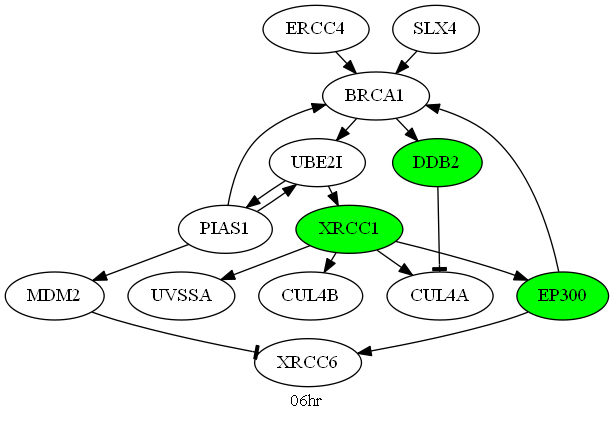

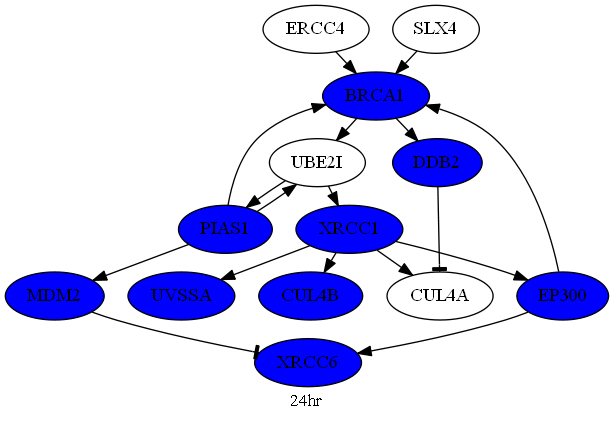

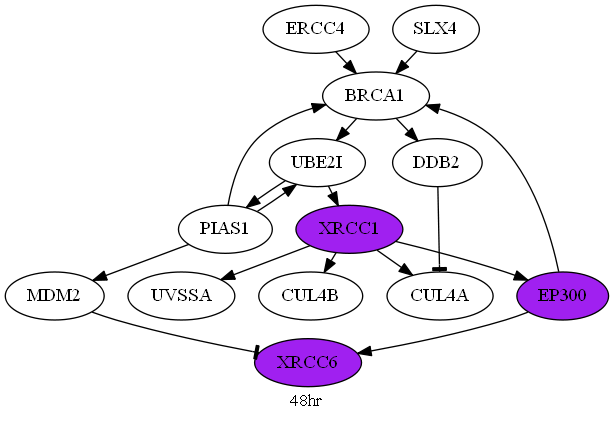

In [9]:
subgraph_gen.measured_networks_over_time(dna_network, ['red', 'green', 'blue', 'purple'], 'dna')

In [29]:
view.render_graph(dna_network)

In [11]:
view.display_graph(term_net_1)

In [33]:
view.render_graph(mol_net_1, add_parent=False)

## Exploring other top hits from 1 hour

### Side effects of cisplatin
Chemotherapy-induced peripheral neuropathy. __[link](https://www.frontiersin.org/articles/10.3389/fnins.2017.00481/full)__
It is not well understood why cisplatin causes CIPN. Surprisely here, we see that Axon Guidance has a combined score of 20.5. 33 species are effected by cisplain that are linked with axon guidance. We are not neural experts and did not know that axon guidance was related to CIPN. Using MAGINE we were able to find ties between the two.

In [13]:
axon_guidance = et.term_to_genes(df=renamed_1hr, term='Axon guidance_Homo sapiens_R-HSA-422475')
print(axon_guidance)

set(['NRCAM', 'SRGAP2', 'CNKSR2', 'SPTBN2', 'SPTBN1', 'SHC1', 'TLN1', 'MAPK3', 'MARK3', 'CRMP1', 'CUL3', 'CLASP2', 'CLTCL1', 'SDCBP', 'RASGRF2', 'ARPC1A', 'AKAP9', 'IRS2', 'MET', 'BRAF', 'PTPRA', 'VWF'])


In [14]:
g = subgraph_gen.neighbors_of_list(axon_guidance, up_stream=True, down_stream=False, max_dist=1, 
                                   include_only=exp_data.sig_species_over_time['01hr']
                                  )
nt.render_graph(g)

In [15]:
chloride_transport = et.term_to_genes(df=renamed_1hr, term='chloride transport')
print(chloride_transport)
chl_trans = subgraph_gen.neighbors_of_list(chloride_transport, max_dist=2, 
#                                            include_only=exp_data.list_species
                                          )
nt.display_graph(chl_trans)

set(['ANO4', 'ANO5', 'ANO6', 'SLC26A8', 'CLIC4'])


# 6 hour time point

In [16]:
time_6_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='06hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_6_hour_prot)
display(slimmed.head(25))

Number of rows went from 265 to 141


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
211872,"mRNA splicing, via spliceosome",1,87.396296,1.684701e-07,"CPSF2,CPSF3,DHX15,DHX8,DHX9,EIF4A3,HNRNPA2B1,HNRNPC,HNRNPH3,HNRNPK,HNRNPU,MAGOHB,NCBP1,PNN,PRPF38A,PUF60,RALY,RBM15,RBM8A,RNPS1,SF3B1,SF3B2,SNRNP40,SPEN,SRRM2,SRSF2,SYNCRIP",27,06hr,proteomics_up,GO_Biological_Process_2017
210292,mRNA processing_Mus musculus_WP310,1,57.331009,6.868228e-10,"ACIN1,BCLAF1,BRWD1,CPSF2,CPSF3,DDX20,DDX21,DHX15,DHX8,DHX9,EIF3G,EIF4A3,HNRNPA2B1,HNRNPC,HNRNPK,HNRNPU,MAK16,MATR3,NCL,NELFE,PPARGC1B,PUF60,RALY,RBM6,RBM8A,RNPS1,RPL12,RPL8,RPS6,RPS9,SF3B1,SF3B2,SFPQ,SLTM,SNRNP40,SON,SPEN,SRSF2,SYNCRIP",39,06hr,proteomics_up,WikiPathways_2016
211873,positive regulation of transcription from RNA polymerase II promoter,2,56.402442,6.010178e-03,"AATF,ARHGEF2,ATF2,CCNL1,CEBPZ,EGFR,FOXK2,FUBP3,HMGA1,HNRNPK,IRF2BPL,JUN,JUNB,JUND,KMT2D,MAPK3,MAVS,MKL2,MYC,OGT,PPARGC1B,PPP1R12A,PRDM2,PRKD2,PRKDC,RFX4,SFPQ,SLC9A1,SP7,SQSTM1,STAT1,TAF1L,TCF3,THRAP3,TNIP1,TP53,TP53BP1",37,06hr,proteomics_up,GO_Biological_Process_2017
210798,Gene Expression_Homo sapiens_R-HSA-74160,1,55.510780,5.921719e-09,"AEBP2,ANP32A,ATF2,ATR,BMS1,BOP1,CPSF2,CPSF3,DARS,DDX20,DDX21,DHX9,DKC1,EIF2S2,EIF3A,EIF3G,EIF4A3,EIF4B,EIF4EBP1,ELAC2,G6PD,HNRNPA2B1,HNRNPC,HNRNPK,HNRNPU,HSPA1A,HSPB1,ICE1,ICE2,JUN,JUNB,LRPPRC,MAPK14,MAPK3,MED24,MYC,NBN,NCBP1,NDRG1,NELFE,NOC2L,NOP56,NOP58,NUP153,NUP188,NUP214,NUP35,NUP98,PARN,PES1,POP1,PPA2,PSMA5,PSMB3,PSMD1,RAD50,RAD9A,RBM8A,RFFL,RNPS1,RPL12,RPL3,RPL8,RPP30,RPS6,RPS9,RRP9,RUNX2,SF3B1,SF3B2,SMG8,SNRNP40,SRSF2,SUDS3,SUPT16H,TAF1L,TARS,TNKS1BP1,TP53,TP53BP2,TPR,TRIM28,UTP14A,UTP18,WDR43,WDR75,YAP1,ZFP36L1,ZNF560,ZNF610,ZNF74",91,06hr,proteomics_up,Reactome_2016
211874,RNA splicing,3,50.639384,1.510552e-05,"DHX15,DHX8,EIF4A3,HNRNPC,HNRNPH3,MAGOHB,NCBP1,RNPS1,SCAF11,SF3B2,SFPQ,SNRNP40,SRSF2,SYNCRIP,WDR62",15,06hr,proteomics_up,GO_Biological_Process_2017
211875,mRNA export from nucleus,4,46.486449,2.371966e-05,"CPSF2,CPSF3,EIF4A3,HNRNPA2B1,MAGOHB,NCBP1,NUP153,NUP188,NUP214,NUP35,NUP98,RBM8A,RNPS1,SRSF2,TPR",15,06hr,proteomics_up,GO_Biological_Process_2017
211876,rRNA processing,5,45.422599,3.304134e-04,"BMS1,BOP1,DKC1,NOP56,NOP58,PES1,RPL12,RPL3,RPL8,RPP30,RPS6,RPS9,RRP1B,RRP9,UTP14A,UTP18,WDR43,WDR75",18,06hr,proteomics_up,GO_Biological_Process_2017
211877,protein sumoylation,6,42.216525,6.080538e-05,"BCL11A,NUP153,NUP188,NUP214,NUP35,NUP98,SENP2,TOP2A,TOP2B,TP53BP1,TPR,TRIM28",12,06hr,proteomics_up,GO_Biological_Process_2017
209818,RNA transport_Homo sapiens_hsa03013,1,41.821069,4.495322e-08,"ACIN1,DDX20,EIF2S2,EIF3A,EIF3G,EIF4A3,EIF4B,EIF4EBP1,ELAC2,MAGOHB,NCBP1,NUP153,NUP188,NUP214,NUP35,NUP98,PNN,POP1,RBM8A,RNPS1,RPP30,SENP2,TPR",23,06hr,proteomics_up,KEGG_2016
209819,Spliceosome_Homo sapiens_hsa03040,2,38.345407,4.797907e-08,"ACIN1,DHX15,DHX8,EIF4A3,HNRNPC,HNRNPK,HNRNPU,HSPA1A,MAGOHB,NCBP1,PRPF38A,PUF60,RBM25,RBM8A,RBMXL3,SF3B1,SF3B2,SNRNP40,SRSF2,SRSF8",20,06hr,proteomics_up,KEGG_2016


In [17]:
shorten_names = {
    'protein sumoylation':'protein sumoylation',
    'Activation of the AP-1 family of transcription factors_Homo sapiens_R-HSA-450341' : 'AP1 activation',
    'response to cAMP' : 'response to cAMP',
                }
time_6_hour_prot['term_name'] = time_6_hour_prot['term_name'].replace(shorten_names)
term_net_6, mol_net_6 = nt.create_subnetwork(shorten_names.values(), time_6_hour_prot, network, '06hr', cytoscape_js=False)


('response to cAMP', 5)
('protein sumoylation', 12)
('AP1 activation', 6)
Looking for direct edges


In [18]:
view.display_graph(term_net_6)

In [19]:
view.render_graph(mol_net_6)

In [20]:
# nt.find_neighbors(g=mol_net_1, start='ATR', up_stream=False, down_stream=True, max_dist=1, render=True)
# nt.find_neighbors(g=mol_net_1, start='ATR', up_stream=True, down_stream=False, max_dist=3, render=True)

In [21]:
time_24_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='24hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_24_hour_prot, threshold=.5)
display(slimmed.head(25))

Number of rows went from 378 to 141


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
234775,"mRNA splicing, via spliceosome",1,209.979563,3.357108e-21,"CPSF1,CSTF1,CWC15,DDX42,EFTUD2,EIF4A3,FIP1L1,FUS,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPH3,HNRNPK,HNRNPL,HNRNPR,HNRNPU,METTL3,NCBP1,PCF11,PNN,PRPF19,PRPF38A,PRPF4B,PUF60,RALY,RBM15,RBM22,RBM8A,RBMX,SF1,SF3A1,SF3A3,SF3B2,SF3B3,SNRPC,SNRPF,SNU13,SPEN,SRRM1,SRRM2,SRSF1,SRSF10,SRSF11,SRSF6,SRSF7,SYMPK,TRA2A,TRA2B,WBP11,ZCCHC8",53,24hr,proteomics_up,GO_Biological_Process_2017
233501,Gene Expression_Homo sapiens_R-HSA-74160,2,102.139686,1.220822e-18,"AIMP2,ANP32A,ATF2,ATR,BNIP3L,BOP1,C2ORF49,CD3EAP,CDK12,CHD3,CPSF1,CSTF1,CWC15,DARS,DDX21,DDX4,DDX49,DKC1,DNMT1,DUS2,EEF2,EFTUD2,EIF4A3,EIF4B,EIF4EBP1,EIF5B,FBL,FIP1L1,FUS,GAR1,GPX2,GSK3B,HEATR1,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPK,HNRNPL,HNRNPR,HNRNPU,HSP90AA1,HSPB1,IMP3,JUN,JUNB,KHSRP,KRR1,LAMTOR1,LRPPRC,MAPK14,MAPK3,MED1,MED24,METTL3,MPHOSPH6,MTOR,NBN,NCBP1,NCOR2,NELFE,NOC2L,NOL11,NOP2,NOP56,NOP58,NR0B1,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,PARN,PARP1,PCF11,POLR1A,POP1,PRPF19,PSMA3,PSMA5,PSMB10,PSMB7,PSMD1,PSMD4,PSMF1,PTRF,PWP2,RAD50,RAD9A,RANBP2,RARS,RBM8A,RBMX,RPL12,RPL18A,RPL30,RPLP2,RPP30,RPP38,RPRD2,RPS3,RPS3A,RRP8,RRP9,SAP18,SF3A1,SF3A3,SF3B2,SF3B3,SFN,SMG8,SNRPF,SPCS2,SPCS3,SRRM1,SRSF1,SRSF11,SRSF6,SRSF7,SSRP1,TAF9,TBL3,TNKS1BP1,TP53,TP53BP2,TP53I3,TPR,TRA2B,TRIM28,TRMT5,TRMT6,TRMT61A,TWISTNB,UTP15,WDR3,WDR36,WDR43,WDR75,WTAP,XPO5,YAP1,YWHAE,YWHAQ,ZNF432,ZNF436,ZNF484",152,24hr,proteomics_up,Reactome_2016
234776,rRNA processing,2,96.343182,4.915441e-10,"BOP1,DDX49,DKC1,EBNA1BP2,FBL,HEATR1,IMP3,KRR1,MDN1,MPHOSPH6,NOL11,NOLC1,NOP56,NOP58,PWP2,RPL12,RPL18A,RPL30,RPLP2,RPP30,RPP38,RPS3,RPS3A,RRP1B,RRP9,SNU13,TBL3,UTP15,UTP4,WDR3,WDR36,WDR43,WDR75",33,24hr,proteomics_up,GO_Biological_Process_2017
234777,regulation of cellular response to heat,3,84.291259,2.769570e-11,"ATR,BAG3,CAMK2D,CCAR2,GSK3B,HSF1,HSP90AA1,HSPB8,MAPK1,MAPK3,MTOR,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,RANBP2,TPR,YWHAE",23,24hr,proteomics_up,GO_Biological_Process_2017
232930,mRNA processing_Mus musculus_WP310,1,75.595732,1.401438e-13,"ACIN1,AKAP1,BCLAF1,CPSF1,CSTF1,DDX21,DDX4,DND1,EFTUD2,EIF4A3,EIF4G3,FBL,HNRNPA2B1,HNRNPAB,HNRNPC,HNRNPD,HNRNPDL,HNRNPF,HNRNPK,HNRNPL,HNRNPLL,HNRNPR,HNRNPU,ILF3,IMP3,KIAA1429,MATR3,METTL3,NCL,NELFE,PRPF4B,PUF60,RALY,RBM15B,RBM22,RBM4,RBM8A,RBMX,RPL12,SF3A1,SF3A3,SF3B2,SF3B3,SLTM,SMC1A,SNRPF,SON,SPEN,SRSF1,SRSF10,SRSF11,SRSF6,SRSF7,TAF15,TRA2B,TROVE2,ZNF622",57,24hr,proteomics_up,WikiPathways_2016
234778,mRNA export from nucleus,4,73.912638,1.055205e-09,"CPSF1,EIF4A3,FIP1L1,HNRNPA2B1,NCBP1,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,RANBP2,RBM8A,SRRM1,SRSF1,SRSF10,SRSF11,SRSF6,SRSF7,SYMPK,TPR",24,24hr,proteomics_up,GO_Biological_Process_2017
233504,Cell Cycle_Homo sapiens_R-HSA-1640170,5,62.048920,6.097046e-10,"AKAP9,ATR,BANF1,CEP131,CNTRL,DIDO1,DKC1,DYNC1H1,EMD,ERCC6L,GORASP2,HAUS6,HSP90AA1,HSPA2,KIF2A,KNTC1,LMNA,LMNB1,LPIN1,MAPK1,MAPK3,MCM2,MCM6,NBN,NCAPD2,NEK9,NUMA1,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,OPTN,PKMYT1,PPP1R12A,PSMA3,PSMA5,PSMB10,PSMB7,PSMD1,PSMD4,PSMF1,RAD50,RAD9A,RANBP2,SFN,SMC1A,SPDL1,TERF2IP,TMPO,TOP2A,TP53,TPR,TUBGCP3,UIMC1,YWHAE,YWHAQ,ZWINT",62,24hr,proteomics_up,Reactome_2016
234780,positive regulation of apoptotic process,6,53.817781,5.123684e-05,"AKAP13,ANO6,ARHGEF1,ARHGEF11,ARHGEF7,BAD,BCLAF1,BIN1,BNIP3,BNIP3L,CCAR2,DIABLO,FAF1,HSPD1,HTT,JUN,LILRB1,MCF2L,NEURL1,PHLDA3,PIK3R2,SAP18,SCRIB,SOD1,TOP2A,TP53,TRIO,ZNF622",28,24hr,proteomics_up,GO_Biological_Process_2017
234781,RNA splicing,7,50.724093,2.169909e-06,"CCAR2,CDK12,EFTUD2,EIF4A3,HNRNPC,HNRNPH3,KHSRP,MTERF3,NCBP1,PPIG,PRPF4B,SF3A3,SF3B2,SF3B3,SNRPF,SRRM1,SRSF11,SRSF7,WDR62",19,24hr,proteomics_up,GO_Biological_Process_2017
234783,"regulation of alternative mRNA splicing, via spliceosome",9,45.264258,4.438842e-07,"HNRNPA1,HNRNPL,RBM15B,RBM4,RBM8A,RBMX,SAP18,SF3A1,S

In [22]:
shorten_names = {
                 'cellular response to DNA damage stimulus': 'DDR',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'Apoptosis_Homo sapiens_R-HSA-109581' : 'Apoptosis',
                }
renamed = time_24_hour_prot.copy()
time_24_hour_prot['term_name'] = time_24_hour_prot['term_name'].replace(shorten_names)
term_net_24, mol_net_24 = nt.create_subnetwork(shorten_names.values(), time_24_hour_prot, network, '24hr', cytoscape_js=False)

('DDR', 20)
('negative regulation of apoptosis', 27)
('Apoptosis', 26)
Looking for direct edges


In [23]:
view.display_graph(term_net_24)

In [24]:
view.display_graph(mol_net_24, add_parent=True )

In [25]:
time_48_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='48hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_48_hour_prot, threshold=.5)
display(slimmed.head(25))

Number of rows went from 419 to 167


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
258340,"mRNA splicing, via spliceosome",1,234.079702,6.840193e-24,"DDX39B,DDX42,DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPH1,HNRNPH3,HNRNPK,HNRNPM,HNRNPR,HNRNPU,HNRNPUL1,HSPA8,HTATSF1,LSM8,MAGOHB,NCBP1,PNN,PRPF31,PRPF4B,PUF60,RALY,RBM8A,RBMX,SART3,SF3A3,SNRNP70,SNRPA,SNRPC,SNRPD1,SNRPD2,SNRPE,SNRPF,SNRPGP15,SNU13,SPEN,SRRM2,SRRT,SRSF1,SRSF3,SRSF4,SRSF7,SRSF9,SYMPK,TRA2A,TRA2B,U2AF1,U2AF2,WBP11,YBX1",56,48hr,proteomics_up,GO_Biological_Process_2017
258341,neutrophil degranulation,2,180.858577,5.282489e-13,"ACAA1,AHSG,ALDOA,ANO6,ANXA3,APEH,ATP6V0A1,CD44,CD47,CD59,CKAP4,COTL1,CPNE3,CYB5R3,DDOST,DIAPH1,DYNC1LI1,EEF2,FAF2,FTH1,FTL,GPI,GSN,HBB,HMOX2,HSPA8,HUWE1,ITGAV,KRT1,LAMP1,LAMP2,LAMTOR1,LTF,MAPK1,MGST1,MLEC,MMP8,NCKAP1L,NCSTN,NRAS,PA2G4,PDAP1,PGRMC1,PKM,PNP,PRDX4,PSAP,PSEN1,PSMA5,PSMD1,RAB14,RAB18,RAB5C,RAP1B,RHOG,SDCBP,SPTAN1,STOM,STXBP2,SURF4,VAPA,VCP,XRCC6",63,48hr,proteomics_up,GO_Biological_Process_2017
257060,Gene Expression_Homo sapiens_R-HSA-74160,3,92.138380,4.733666e-17,"ANP32A,APEH,BAZ1B,BDP1,BOP1,CD3EAP,CD44,CDK12,CHD4,COX4I1,COX5A,COX5B,COX7C,CTDP1,DDOST,DDX21,DDX39B,DHX9,DKC1,EEF2,EIF3A,EIF3J,EIF4B,EIF5B,EPRS,FAS,FBL,FUS,GPI,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPH1,HNRNPK,HNRNPM,HNRNPR,HNRNPU,HNRNPUL1,HSPA8,HSPB1,INTS1,JUN,JUNB,KHSRP,LAMTOR1,LSM8,MAPK3,MTA1,NBN,NCBP1,NCOR1,NDC1,NDUFA4,NHP2,NOC2L,NOL11,NOP2,NOP56,NOP58,NPM1,NUP153,NUP188,NUP214,NUP35,NUP88,POLR1E,PPP2CA,PRMT1,PRPF31,PSMA5,PSMB4,PSMD1,PSMD4,PTRF,RAD50,RAN,RANBP2,RBM8A,RBMX,RIOK3,RPL10,RPL28,RPL29,RPL3,RPLP2,RPN1,RPN2,RPRD2,RPS21,RPS6,RPSA,RRM2B,RRP9,RTCB,SEC61B,SET,SF3A3,SFN,SIRT1,SMG1,SNRNP70,SNRPA,SNRPD1,SNRPD2,SNRPE,SNRPF,SPCS2,SRRT,SRSF1,SRSF3,SRSF4,SRSF7,SRSF9,SSR1,SSR4,SUPT16H,TBL1XR1,TBL3,TNFRSF10A,TNKS1BP1,TNPO1,TOPBP1,TP53,TPR,TRA2B,TRIM28,TSC2,TWISTNB,TXN,U2AF1,U2AF2,UPF2,USP2,UTP15,VARS,WDR12,WDR75,WTAP,YBX1,YWHAH,YWHAQ,ZC3H8,ZFP36",147,48hr,proteomics_up,Reactome_2016
258342,mitochondrial ATP synthesis coupled proton transport,3,90.680332,2.328503e-12,"ATP5A1,ATP5B,ATP5C1,ATP5D,ATP5F1,ATP5H,ATP5I,ATP5J,ATP5J2,ATP5L,ATP5O,COX5B,MT-ATP6,STOML2",14,48hr,proteomics_up,GO_Biological_Process_2017
257062,Metabolism of proteins_Homo sapiens_R-HSA-392499,5,82.654616,2.497306e-15,"APEH,APOA1,ARF4,ATP5A1,ATP5B,CALR,CANX,CD59,CKAP4,COPA,COPG2,CTNNB1,DAD1,DDOST,DERL2,EEF2,EIF3A,EIF3J,EIF4B,EIF5B,EXOC3,EXOC7,GALNT2,GANAB,GNAI3,GNB2,GNG12,GNG4,GSK3A,GSN,HDGF,HNRNPC,HNRNPK,HSP90B1,HSPD1,IDH3G,IGFBP2,KHSRP,KIF13A,LMAN1,LMAN2L,LMNA,LTF,MCFD2,MFGE8,MLEC,MPDU1,MTA1,MTX2,MUC16,MUC19,MVD,MYO5A,NAGK,NDC1,NOP56,NOP58,NUP153,NUP188,NUP214,NUP35,NUP88,PDIA6,PHC1,PRKCSH,RANBP2,RPL10,RPL28,RPL29,RPL3,RPLP2,RPN1,RPN2,RPS21,RPS6,RPSA,SEC22B,SEC24C,SEC61B,SEC62,SENP5,SLC25A6,SPCS2,SPTAN1,SPTBN1,SSR1,SSR4,TFG,TGFBI,THBS1,THSD7A,TIMM8A,TIMM9,TLN1,TMED10,TMED2,TMED7,TMED9,TMEM115,TOP2A,TOP2B,TP53,TP53BP1,TPR,TRAPPC3,TXN,VDAC1,XPC",108,48hr,proteomics_up,Reactome_2016
256490,mRNA processing_Mus musculus_WP310,1,81.175763,3.223967e-15,"ACIN1,BCLAF1,DDX21,DDX39B,DHX9,FBL,HNRNPA0,HNRNPA2B1,HNRNPAB,HNRNPC,HNRNPD,HNRNPDL,HNRNPF,HNRNPH1,HNRNPK,HNRNPM,HNRNPR,HNRNPU,HTATSF1,KIAA1429,LSM8,MATR3,NCL,NIP7,NPM1,PPM1G,PRMT1,PRPF4B,PUF60,RALY,RBM10,RBM12B,RBM14,RBM7,RBM8A,RBMX,RPS6,SAFB2,SART3,SCAF8,SF3A3,SLIRP,SLTM,SNRNP70,SNRPD1,SNRPD2,SNRPF,SPEN,SRSF1,SRSF3,SRSF4,SRSF7,SRSF9,TAF15,TMED10,TRA2B,TROVE2,U2AF2,YBX1",59,48hr,proteomics_up,WikiPathways_2016
258344,membrane organization,5,75.662017,7.658452e-07,"AAK1,ACTR3,AP2B1,ARPC1A,CCDC88A,CTTN,DENND4C,DENND5B,EGFR,GAPVD1,HIP1,HSPA8,M6PR,OPTN,RAB14,RAB18,RAB21,RAB35,RAB5C,RAB8B,RALA,RIN1,SCARB2,SFN,TF,TFRC,TRAPPC3,TSC2,VAMP3,YWHAH,YWHAQ",31,48hr,proteomics_up,GO_Biological_Process_2017
258346,mRNA export from nucleus,7,67.106534,4.281073e-09,"DDX39B,HNRNPA2B1,MAGOHB,NCBP1,NDC1,NUP153,NUP188,NUP214,NUP35,NUP88,RANBP2,RBM8A,SMG1,SRSF1,SRSF3,SRSF4,SRSF7,SRSF9,SYMPK,TPR,U2AF1,U2AF2,UPF2",23,48hr,proteomics_up,GO_B

In [26]:
shorten_names = {
                 'membrane organization': 'Membrane Organization',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'neutrophil degranulation' : 'neutrophil degranulation',
                }
time_48_hour_prot['term_name'] = time_48_hour_prot['term_name'].replace(shorten_names)
term_net_48, mol_net_48 = nt.create_subnetwork(shorten_names.values(), time_48_hour_prot, network, '48hr', cytoscape_js=False)

('Membrane Organization', 31)
('negative regulation of apoptosis', 34)
('neutrophil degranulation', 63)
Looking for direct edges


In [27]:
view.display_graph(term_net_48)

In [28]:
view.render_graph(mol_net_48)